In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import mean_squared_error

from model_preparation import LSTMModel
from model_preprocessing import preprocessors

# Load

In [2]:
df_train_1 = pd.read_csv('train/df_train_1.csv', index_col='date', parse_dates=True)
df_test_1 = pd.read_csv('test/df_test_1.csv', index_col='date', parse_dates=True)
df_train_2 = pd.read_csv('train/df_train_2.csv', index_col='date', parse_dates=True)
df_test_2 = pd.read_csv('test/df_test_2.csv', index_col='date', parse_dates=True)
df_train_3 = pd.read_csv('train/df_train_3.csv', index_col='date', parse_dates=True)
df_test_3 = pd.read_csv('test/df_test_3.csv', index_col='date', parse_dates=True)

# Train data

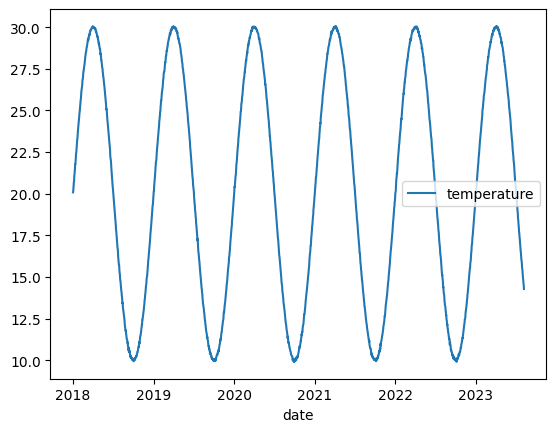

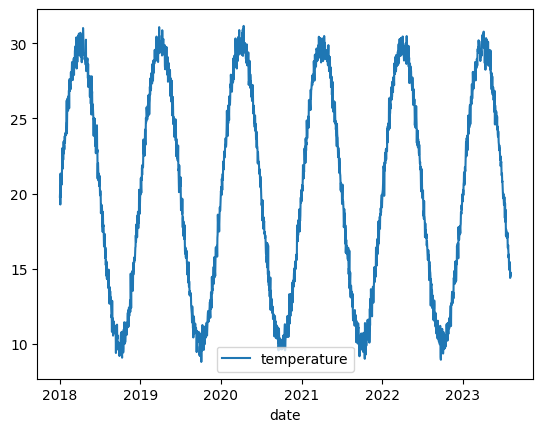

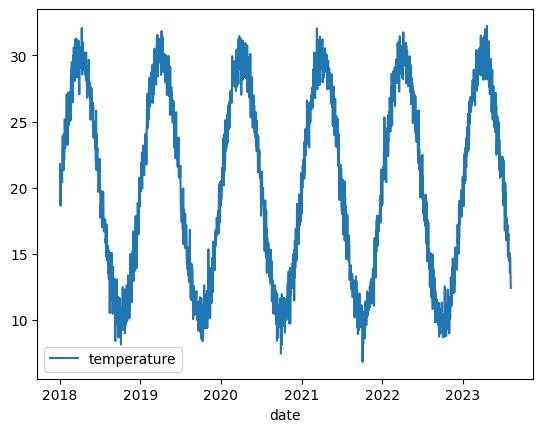

In [3]:
for df_train in [df_train_1, df_train_2, df_train_3]:
    sns.lineplot(df_train)
    plt.show()

# Test data

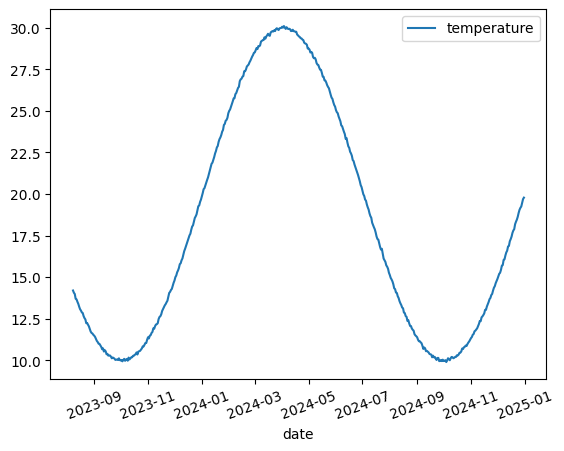

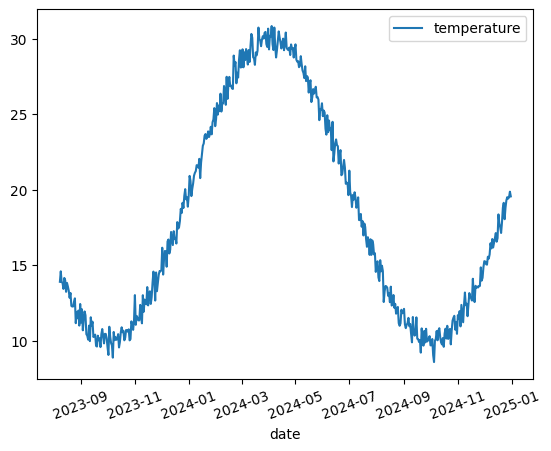

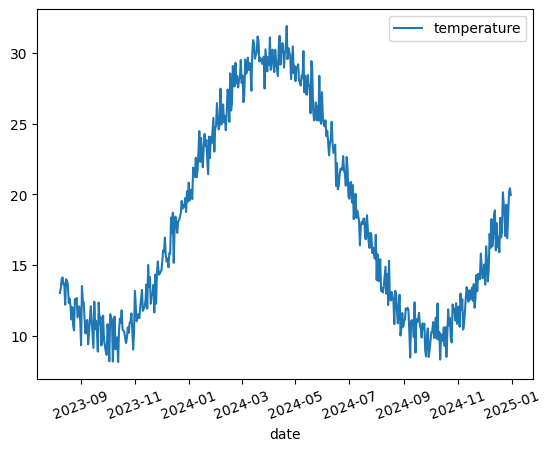

In [4]:
for df_test in [df_test_1, df_test_2, df_test_3]:
    sns.lineplot(df_test)
    plt.xticks(rotation=20)
    plt.show()

# Predictions

In [5]:
model = LSTMModel()
model.load_state_dict(torch.load('model.pt'))
model.eval()

LSTMModel(
  (lstm): LSTM(2, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [6]:
predictions = []
for dataset in [f'test/df_test_{i+1}.csv' for i in range(3)]:
    data = preprocessors.fit_transform(pd.read_csv(dataset))
    X = data[:, (0, 1)]
    y = data[:, 2]
    X = torch.tensor(X, dtype=torch.float)
    y = torch.tensor(y, dtype=torch.float)

    with torch.no_grad():
        predictions.append(model(X.unsqueeze(1)).numpy().flatten())
        
scaler = preprocessors.transformers_[1][1][0]
predictions = scaler.inverse_transform(predictions)

In [7]:
df_test_1['predictions'] = predictions[0]
df_test_2['predictions'] = predictions[1]
df_test_3['predictions'] = predictions[2]

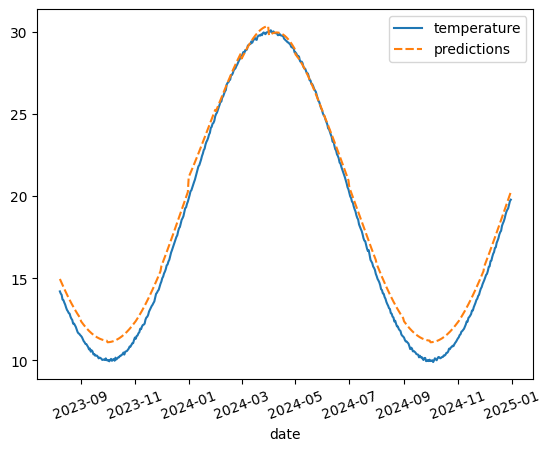

MSE: 0.6255593229139291


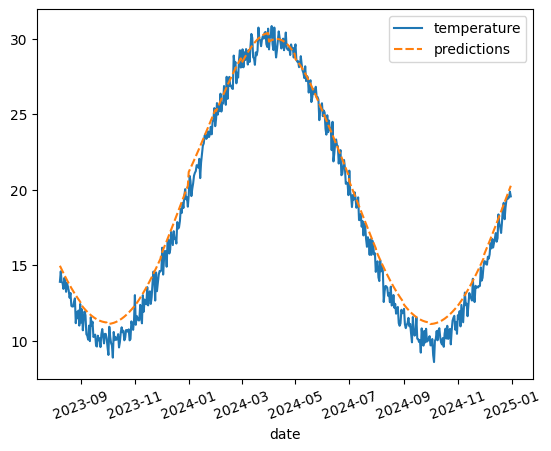

MSE: 0.8961825785815579


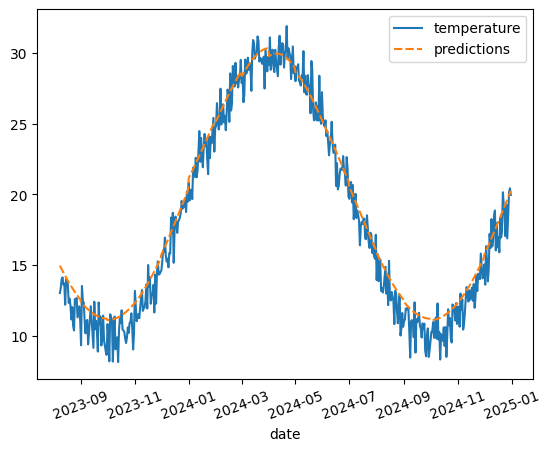

MSE: 1.491609633139828


In [8]:
for df_test in [df_test_1, df_test_2, df_test_3]:
    sns.lineplot(df_test)
    plt.xticks(rotation=20)
    plt.show()
    print(f"MSE: {mean_squared_error(df_test['temperature'], df_test['predictions'])}")